## The Data
The Ames Housing dataset was compiled by Dean De Cock for use in data science education. The dataset that I received for this project contained 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The data included two csv files that were to be used as a training set and the test set for creating the model. It also included a text file that contained full descriptions of each column lightly edited to match the column names used in the training set. An additional csv file, which acted as a benchmark submission from a linear regression on year and month of sale, lot square footage, and number of bedrooms was also included.
***
## Outline
**Exploration**
- Analyze and Clean Datasets
- Describe Data
- Understand Features

**Data Wrangling**
- Handle Missing Data 

**Correlation**
- Highlight Correlation bewtween variables
- Remove Outliers
- Identify (Potentially) Non-essential Features

***

## Exploration
### Analyze Datasets
Let us begin with the training set:

In [287]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Expands view so we are able to read all columns
pd.set_option('display.max_columns', 500)

# Reads training Data
houses = pd.read_csv('train.csv')
houses.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Describe Data

In [288]:
houses.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


After taking a glance at the “houses” dataframe, we can observe that some of the features have missing data by their count. There appears to be 1460 data points for us to use however some features do not total 1460. Next we will dive deeper into the most important feature, the one we are attempting to predict, sale price.

In [289]:
houses['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

/Users/Anthony/anaconda/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


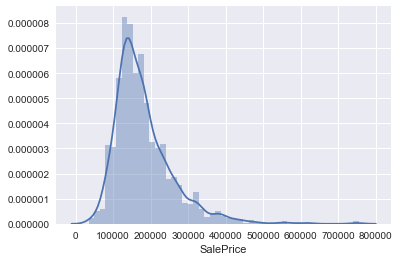

In [290]:
sns.distplot(houses['SalePrice'])

We can see that the plot deviates from a normal distribution, which is expected for a housing market. You would expect to see a higher volume of lower priced houses and a lower volume of higher priced houses. We'll come back to Sale Price in a moment but first let's explore some of the data descriptions. To accomplish this we have to parse the text file that includes all of the descriptions.

### Understand Features

In [291]:
# Read descriptions into dataFrame
data = pd.read_csv ('data_description.csv',names= 'A', index_col= None)
data.head()

,A
0,MSSubClass: Identifies the type of dwelling in...
1,20 1-STORY 1946 & NEWER ALL STYLES
2,30 1-STORY 1945 & OLDER
3,40 1-STORY W/FINISHED ATTIC ALL AGES
4,45 1-1/2 STORY - UNFINISHED ALL AGES


In [292]:
# Converts dataFrame to series for spliting
dataseries = data[data.columns[0]]

# Creates new column from str split
data2 = dataseries.str.split(' ', 1, expand=True)
data2.columns = ['a','b']
data2.head()

,a,b
0,MSSubClass:,Identifies the type of dwelling involved in th...
1,20,1-STORY 1946 & NEWER ALL STYLES
2,30,1-STORY 1945 & OLDER
3,40,1-STORY W/FINISHED ATTIC ALL AGES
4,45,1-1/2 STORY - UNFINISHED ALL AGES


In [293]:
# Creates column mask to select rows that contains ':"
mask = (data2['a'].str.contains(':'))

# Creates column 'c' using parameters from mask
data2['c'] = data2['a'][mask]

# Re-orders columns
data2 = data2[['c','a','b']]

# Creates new dataFrame with 'c' and 'a' and fills all values
data_dict = data2[['c','a']]
data_dict['c'].fillna(method='ffill',inplace=True)
data_dict.head()

/Users/Anthony/anaconda/lib/python3.6/site-packages/pandas/core/generic.py:3295: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,c,a
0,MSSubClass:,MSSubClass:
1,MSSubClass:,20
2,MSSubClass:,30
3,MSSubClass:,40
4,MSSubClass:,45


In [294]:
# Masks remove duplicates in rows
new_mask = (data_dict['c'] != data_dict['a'])
new_mask2 = (data_dict['c'] != data_dict['a'])
data_dict['d'] = data_dict['a'][new_mask]
data_dict['e'] = data_dict['c'][new_mask2]
data_dict2 = data_dict[['e','d']]

# Drops any remaining NaN and labels columns
data_desc = data_dict2.dropna()
data_desc.columns = [['key','value']]
data_desc.head()

,key,value
1,MSSubClass:,20
2,MSSubClass:,30
3,MSSubClass:,40
4,MSSubClass:,45
5,MSSubClass:,50


In [295]:
# Creates blank dictionary
data_dict ={}

# Loops to fill dictionary from dataframe
for x in range(len(data_desc)):
    currentid = data_desc.iloc[x,0]
    currentvalue = data_desc.iloc[x,1]
    data_dict.setdefault(currentid, [])
    data_dict[currentid].append(currentvalue)
#data_dict

### Understand Features

To get a better understanding of the Key column, we will read the csv file I created from the text file "data_descriptions". I created this by selecting only rows in the file that contained a ":" which denoted a description. This can also be seen in the orginal dataframe titled "data".

In [296]:
# Reads keys into dataframe
key_desc = pd.read_csv ('keys.csv',names= 'A', index_col= None)
key_desc.head()

,A
0,SalePrice: the property's sale price in dollar...
1,MSSubClass: The building class
2,MSZoning: The general zoning classification
3,LotFrontage: Linear feet of street connected t...
4,LotArea: Lot size in square feet


In [297]:
data_keys_desc = key_desc[key_desc.columns[0]].str.split(':', 1, expand=True)
data_keys_desc.columns = ['Key','Description']
data_keys_desc.head()

,Key,Description
0,SalePrice,the property's sale price in dollars. This is...
1,MSSubClass,The building class
2,MSZoning,The general zoning classification
3,LotFrontage,Linear feet of street connected to property
4,LotArea,Lot size in square feet


My initial thought in creating these dictionaries and seperating the keys and values is that I will need to eventually apply a "weight" to the values (x) to eventually predict Sale Price (y). 
***

## Data Wrangling

### Handle Missing Data

We will begin by finding the total amount of missind data in our file and then decide if we will keep it or fill it with surrounding data. My initial thought is to get rid of it. This dataset is fairly clean and the collection process is presumably free of erroneous practices due to the concrete nature of a house. For example, if there is a NaN for "FirePlaceQu" it is safe to say that there is no fireplace in the home and not that the surveyors were not able to collect data on this feature. 

In [298]:
# Collects all missing data for feature.
total = houses.isnull().sum().sort_values(ascending=False)

# Calculates the percentage of data that is missing in entire column
percent = (houses.isnull().sum() / houses.isnull().count()
           ).sort_values(ascending=False)

# Combines both into a dataframe
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


After exploring the missing values such as "PoolQC", we can see that my orginally statement remains true. If "PoolArea" is 0, "PoolQC" will be listed as NaN since there is no available quality condition for this feature. This "NaN Overlap" is true in most of these missing values. With that being said I will delete Pool1c:MasVnrArea. I included Fence even though it doesn't have a "NaN Overlap" it corresponds to. It simply indicates that there is no fence at the property. MasVnrArea and MasVnrType seem to be outliers as well as Electrical so we will just delete the observations with missing data.

In [299]:
# Drops missing data's column where the total is larger than 8
houses = houses.drop((missing_data[missing_data['Total'] > 8]).index,1)

# Drops missing observations from 'Electrical' and 'MasVnrArea/Type' 
houses = houses.drop(houses.loc[houses['Electrical'].isnull()].index)
houses = houses.drop(houses.loc[houses['MasVnrArea'].isnull()].index)
houses = houses.drop(houses.loc[houses['MasVnrType'].isnull()].index)
houses.isnull().sum().max()

0

In [300]:
houses.describe()

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.00000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000,1451.000000
mean,729.374225,56.933150,10507.808408,6.093728,5.579600,1971.092350,1984.760165,103.75672,442.274983,46.838043,567.197105,1056.310131,1161.551344,346.742247,5.880772,1514.174363,0.423846,0.057891,1.562371,0.381116,2.866988,1.046175,6.516885,0.612681,1.764990,472.525155,94.412819,46.422467,21.952447,3.430737,15.154376,2.776017,43.758787,6.319090,2007.815300,180624.101999
std,421.737858,42.350366,9992.987081,1.381467,1.113415,30.190266,20.651334,181.10815,455.369276,161.777324,442.209192,437.914609,385.002532,436.453277,48.771560,525.799521,0.518842,0.239449,0.550301,0.502574,0.815086,0.219571,1.626576,0.643443,0.748728,214.171752,125.436852,66.060150,61.108223,29.406940,55.917522,40.301212,497.648467,2.700353,1.329376,79312.128273
min,1.000000,20.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.00000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,364.500000,20.000000,7537.500000,5.000000,5.000000,1954.000000,1966.000000,0.00000,0.000000,0.000000,222.000000,795.000000,882.000000,0.000000,0.000000,1128.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1.000000,327.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129900.000000
50%,729.000000,50.000000,9477.000000,6.000000,5.000000,1972.000000,1993.000000,0.00000,381.000000,0.000000,479.000000,991.000000,1086.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,2.000000,478.000000,0.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,1094.500000,70.000000,11600.000000,7.000000,6.000000,2000.000000,2004.000000,166.00000,707.000000,0.000000,808.000000,1297.500000,1391.000000,728.000000,0.000000,1776.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.00000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Correlation
### Highlight Correlation bewtween variables

After we have removed some of the missing data and we will analzye the data to identify which features correlate the most with 'SalePrice'. This will help us identify non-essential features and point out which features we should focus on the more than others.

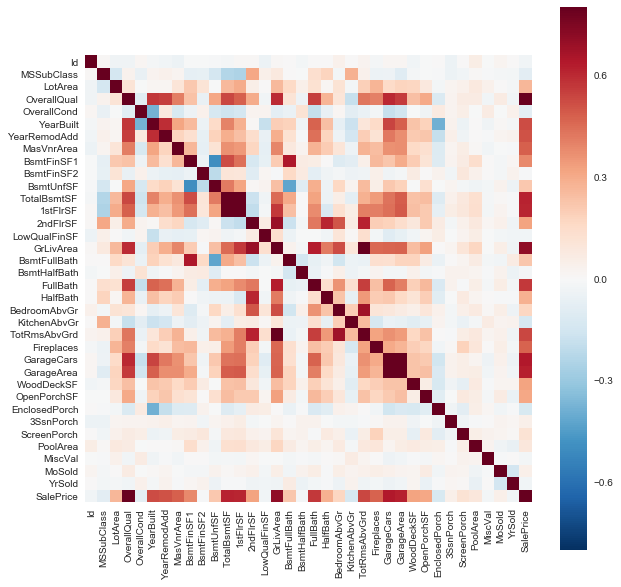

In [301]:
# Creates dataframe that displays correlation matrix
cor_matrix = houses.corr()

# Plots matrix as heatmap
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cor_matrix, vmax=.8, square=True);

Next lets zoom in on the **top 10** features that correlate with SalePrice.

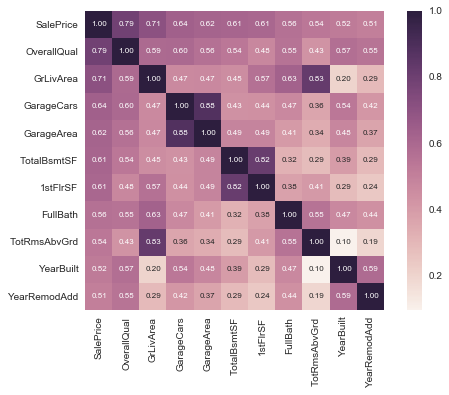

In [302]:
k = 11
correlations = cor_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houses[correlations].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correlations.values, xticklabels=correlations.values)
plt.show()

We can see that "OverallQual", "GrLivArea", and "TotalBsmtSF" are the top 3 that significantly correlate with SalePrice. Before we move into analyzing their correlation, we should do what we came here for... To wrangle some data!

### Removing Outliers

Next we will analyze these top 3 so we can see if there is anything that stands out. We want these features to be uniform and linear as possible so we can fit our regression lines.

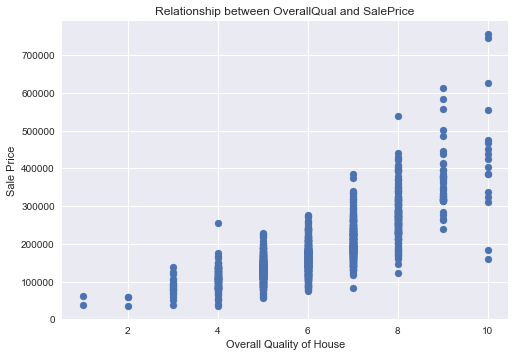

In [303]:
plt.scatter(houses.OverallQual, houses.SalePrice)
plt.xlabel("Overall Quality of House")
plt.ylabel("Sale Price")
plt.title("Relationship between OverallQual and SalePrice")
None

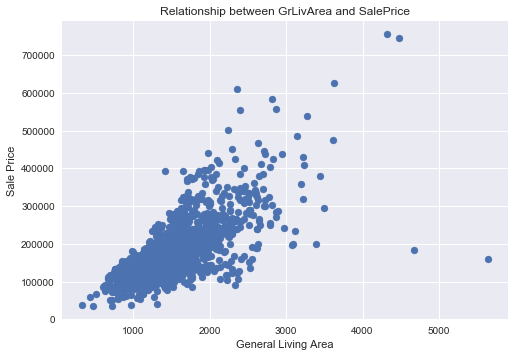

In [304]:
plt.scatter(houses.GrLivArea, houses.SalePrice)
plt.xlabel("General Living Area")
plt.ylabel("Sale Price")
plt.title("Relationship between GrLivArea and SalePrice")
None

**I see outliers....**

In [305]:
# Sorts 'GrLivArea' from highest to lowest to find 'Id' of entry
houses.sort_values(by = 'GrLivArea', ascending = False)[:2]

# Deletes Outliers
houses = houses.drop (houses[houses['Id']== 1299].index)
houses = houses.drop (houses[houses['Id']== 524].index)

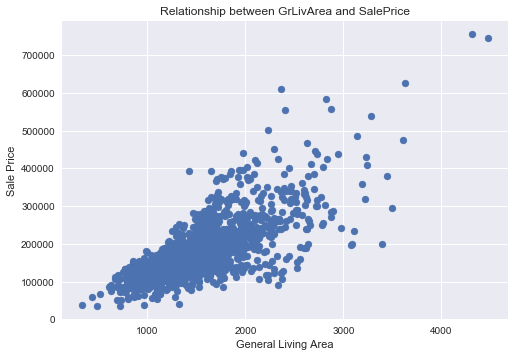

In [306]:
plt.scatter(houses.GrLivArea, houses.SalePrice)
plt.xlabel("General Living Area")
plt.ylabel("Sale Price")
plt.title("Relationship between GrLivArea and SalePrice")
None

**Now that looks better :)**

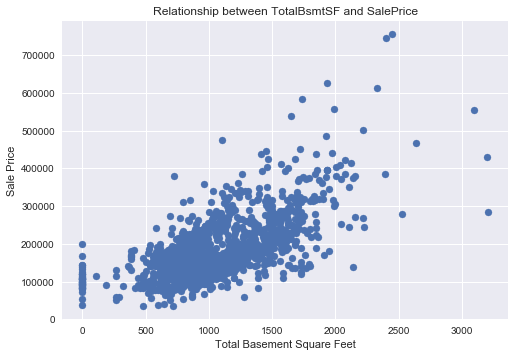

In [307]:
plt.scatter(houses.TotalBsmtSF, houses.SalePrice)
plt.xlabel("Total Basement Square Feet")
plt.ylabel("Sale Price")
plt.title("Relationship between TotalBsmtSF and SalePrice")
None

### Identify (Potentially) Non-essential Features

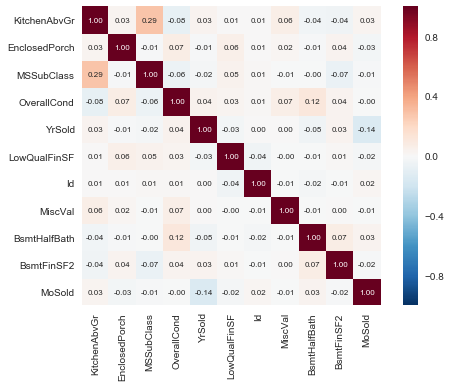

In [308]:
k = 11
correlations = cor_matrix.nsmallest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(houses[correlations].values.T)
sns.set(font_scale=1)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correlations.values, xticklabels=correlations.values)
plt.show()

These are the other potential features that I would consider removing completely from my model since they correlate the least with "SalePrice".